In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
numeric_features = ['Age', 'DailyRate', 'DistanceFromHome',
                    'Education', 'EmployeeCount', 'EmployeeNumber',
                   'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear',
                    'WorkLifeBalance' , 'YearsAtCompany' , 'YearsSinceLastPromotion' , 'YearsWithCurrManager' ]
categorical_features = ['Attrition', 'BusinessTravel' , 'Department' , 'EducationField' ]

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#changing categorical features into dummies
enc = OneHotEncoder(handle_unknown='error', drop='first',categories='auto',sparse=False) # using onehotencoder to improve predictions
le = preprocessing.LabelEncoder() #  transforms the data into a format that is more easily
X1 = df.apply(le.fit_transform) 
X = X1.drop(columns=['Attrition'])

In [6]:
X1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,1,...,3,0,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,2,...,1,0,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,...,2,0,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,4,...,3,0,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,0,1465,...,2,0,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,0,1466,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,0,1467,...,1,0,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,0,1468,...,3,0,0,17,3,1,9,6,0,8


In [7]:
#Use OneHotEncoder to change categorical targets into dummies
enc_df=enc.fit_transform(df[['Attrition']])
df['Attrition1']=enc_df
y=df['Attrition1']

In [8]:
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition1, Length: 1470, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [10]:
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition1
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0.0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,0.0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,80,3,12,3,2,1,0,0,0,0.0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,0.0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,0.0
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,0.0


In [11]:
y.sum()

237.0

In [12]:
from sklearn.model_selection import train_test_split
#Set X_train and X_test
#We use the column "churn" as the target, and rest of the columns as features
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
x=df.groupby(['EducationField', 'Attrition'])[["Education"]].count()

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
#Try Naive Bayes model for prediction
#Use GridSearchCV to look through a list of hyperparameters(different alpha) and use cross validation with k=10
hyperparams = {'alpha': [0.1 , 0.2 , 0.3 , 0.4 , 0.5 ,0.6 , 0.7 , 0.8 , 0.9 , 1] }
model = MultinomialNB()
model_grid = GridSearchCV(model, hyperparams, cv=5)

#fit the decision tree with the X_train and the best decision tree model in GridSearchCV
best_model = model_grid.fit(X_train, y_train)
print(f"The best multinomial naive bayes model's cross validation error = {1 - best_model.best_score_:.2f}")

The best multinomial naive bayes model's cross validation error = 0.43


In [15]:
from sklearn.tree import DecisionTreeClassifier
#Try decision tree classifier
#Use GridSearchCV to look through a list of hyperparameters(different max_depth etc) and use cross validation with k=5
hyperparams = {'max_depth': [3, 5, 10,15, 20],
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': [2, 4]}
model = DecisionTreeClassifier(random_state = 1)
model_grid = GridSearchCV(model, hyperparams, cv=5)

#fit the decision tree with the new X_train and the best decision tree model in GridSearchCV
best_model = model_grid.fit(X_train, y_train)
print(f"The best decision tree model's cross validation error = {1 - best_model.best_score_:.2f}")

The best decision tree model's cross validation error = 0.15


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs').fit(X_train,y_train)
#cv = cross_validate(model,X_train,y_train,cv=5)
print(f"The logistic regression's training error rate = {1 - model.score(X_train, y_train):.2f}")

The logistic regression's training error rate = 0.14


C:\Users\z_sal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.neighbors import KNeighborsClassifier
hyperparams = {'n_neighbors': [1, 3, 5]}
knn = KNeighborsClassifier()
model_grid = GridSearchCV(knn, hyperparams, cv=5)
               
best_model = model_grid.fit(X_train, y_train)
print(f"The best knn classifier model's cross validation error = {1 - best_model.best_score_:.2f}")

The best knn classifier model's cross validation error = 0.18


In [18]:
from sklearn.ensemble import RandomForestClassifier
hyperparams = {'max_depth': [50,75,100,None],
              "n_estimators":[100,120,150]}
model = RandomForestClassifier(random_state = 1)
model_grid = GridSearchCV(model, hyperparams, cv=5)
best_model = model_grid.fit(X_train, y_train)
print(f"The best random forest classifier's cross validation error = {1 - best_model.best_score_:.2f}")

The best random forest classifier's cross validation error = 0.14


In [19]:
print(f"Best hyperparameter: {model_grid.best_params_}")

Best hyperparameter: {'max_depth': 50, 'n_estimators': 150}


In [20]:
model_final = RandomForestClassifier(max_depth = 50, n_estimators=120, random_state = 1)

In [21]:
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=6)#Since we have both categorical and quantitive features, we select mutual_info_classif
selector.fit(X_train, y_train)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
best_features = selector.get_support(indices=True)

In [22]:
X_train_new

array([[   2, 1036,    1,    5,    1,    1],
       [   0,  336,    0,   10,    0,    0],
       [   0,  489,    0,    1,    0,    7],
       ...,
       [   3, 1235,    1,   10,    0,    7],
       [   3, 1227,    1,   11,    1,    1],
       [   0,   44,    0,    2,    1,    0]], dtype=int64)

In [23]:
best_features

array([13, 17, 21, 22, 26, 32], dtype=int64)

In [24]:
pd.DataFrame({'feature': X_train.columns,
              'importance':selector.scores_}).sort_values(by='importance', ascending=False).iloc[0:6,]

,feature,importance
13,JobLevel,0.048481
21,OverTime,0.034059
26,StockOptionLevel,0.028911
32,YearsSinceLastPromotion,0.024899
17,MonthlyIncome,0.024317
22,PercentSalaryHike,0.020904


In [25]:
from sklearn.model_selection import cross_validate 
#We firstly try to use the best features selected from SelectKBest.
cv = cross_validate(model_final, X_train_new, y_train, cv=5) #X_train_new has only features selected in SelectKBest
print(f"The cross-validation error with 6 top features = {1 - cv['test_score'].mean():.2f}")

The cross-validation error with 6 top features = 0.16


In [26]:
model_final.fit(X_train, y_train) #we now still use the original set of X
print(pd.DataFrame({'feature': X_train.columns,'importance':model_final.feature_importances_}).sort_values(by='importance', ascending=False))

                     feature  importance
17             MonthlyIncome    0.076136
2                  DailyRate    0.054602
0                        Age    0.053353
8             EmployeeNumber    0.051576
21                  OverTime    0.050559
27         TotalWorkingYears    0.048294
4           DistanceFromHome    0.047910
18               MonthlyRate    0.047777
30            YearsAtCompany    0.045361
11                HourlyRate    0.042929
14                   JobRole    0.034148
9    EnvironmentSatisfaction    0.033711
22         PercentSalaryHike    0.031061
32   YearsSinceLastPromotion    0.030507
12            JobInvolvement    0.029726
19        NumCompaniesWorked    0.028442
33      YearsWithCurrManager    0.027359
29           WorkLifeBalance    0.027187
26          StockOptionLevel    0.025936
28     TrainingTimesLastYear    0.025403
31        YearsInCurrentRole    0.022598
15           JobSatisfaction    0.022296
6             EducationField    0.022212
16             M

In [27]:
# Therefore we drop the least two important features (whose importance level are below 0.02)
X_train_final = X_train.drop(columns=['Education', 'BusinessTravel' , 'Department' , 'Gender' , 'PerformanceRating' , 'EmployeeCount' , 
                                    'Over18' , 'StandardHours' ])
cv = cross_validate(model_final, X_train_final, y_train, cv=5)
print(f"The cross-validation error with 2 decreased features = {1 - cv['test_score'].mean():.2f}")

The cross-validation error with 2 decreased features = 0.14


In [28]:
model_final.fit(X_train_final,y_train)
X_test_final = X_test.drop(columns=['Education', 'BusinessTravel' , 'Department' , 'Gender' , 'PerformanceRating' , 'EmployeeCount' , 
                                    'Over18' , 'StandardHours' ])
print(f"Our final model's testing error rate = {1 - model_final.score(X_test_final, y_test):.2f}")

Our final model's testing error rate = 0.18


In [29]:
predicted_proba = model_final.predict_proba(X_test_final)
model_final.classes_

array([0., 1.])

In [30]:
#Now we would like to calculate how many people have the intention to Attrition (Attrition = 1)
n_lst=[]
for i in range(len(predicted_proba)): 
    if predicted_proba[i][0]>0.5:
        n_lst.append(i)
    else:
        continue
print(len(n_lst)/len(X_test_final))

0.9523809523809523


In [31]:
from sklearn.metrics import confusion_matrix
threshold = 0.5
y_predicted = (predicted_proba[:,1] >= threshold).astype('int')
confusion_matrix(y_test, y_predicted).ravel() #(tn, fp, fn, tp)

array([232,   4,  48,  10], dtype=int64)

In [32]:
X_train_final.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [35]:
x=x.reset_index()
x

,EducationField,Attrition,Education
0,Human Resources,No,20
1,Human Resources,Yes,7
2,Life Sciences,No,517
3,Life Sciences,Yes,89
4,Marketing,No,124
5,Marketing,Yes,35
6,Medical,No,401
7,Medical,Yes,63
8,Other,No,71
9,Other,Yes,11


<BarContainer object of 12 artists>

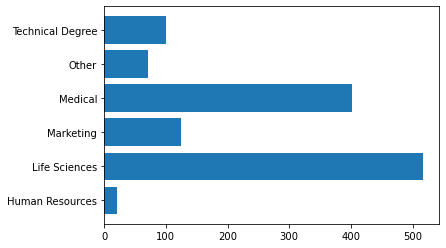

In [37]:
plt.barh(x.EducationField,x.Education)

In [38]:
x.value_counts()

EducationField    Attrition  Education
Human Resources   No         20           1
                  Yes        7            1
Life Sciences     No         517          1
                  Yes        89           1
Marketing         No         124          1
                  Yes        35           1
Medical           No         401          1
                  Yes        63           1
Other             No         71           1
                  Yes        11           1
Technical Degree  No         100          1
                  Yes        32           1
dtype: int64

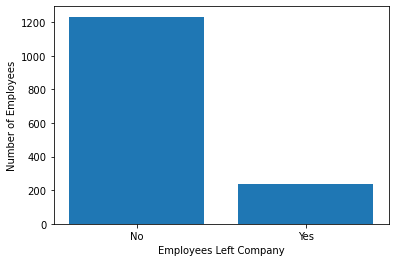

In [39]:
### Camparing the number of employees who decided to leave the company
y=df.groupby('Attrition').count()
plt.bar(y.index.values, y['RelationshipSatisfaction'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [40]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

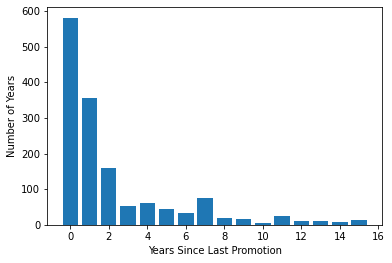

In [41]:
num_projects=df.groupby('YearsSinceLastPromotion').count()
plt.bar(num_projects.index.values, num_projects['YearsAtCompany'])
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Number of Years')
plt.show()

In [42]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [43]:
df.groupby(['Gender'])[['Attrition']].count()

,Attrition
Gender,
Female,588
Male,882


In [44]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition1
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


In [45]:
df.YearsAtCompany.sort_values(ascending=True)

1311     0
1371     0
460      0
1068     0
457      0
        ..
561     34
1116    36
270     36
98      37
126     40
Name: YearsAtCompany, Length: 1470, dtype: int64